In [121]:
# suc_penalties = np.array(suc_penalties)
# suc_budgets = np.array(suc_budgets)

# suc_penalties_encoded = np.array([Encoder[penalty] for penalty in suc_penalties])
# # print(suc_penalties_encoded)
# # print(suc_budgets)
# # print(len(suc_penalties_encoded))
# # Строим гистограмму
# hist, xedges, yedges = np.histogram2d(suc_penalties_encoded, suc_budgets, bins = [4,8], range = [[0,4], [0.2 * Config['size'], 0.8 * Config['size']]])

# #print(xedges, yedges, hist)
# # Подготавливаем координаты
# xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0
# print(xpos, ypos)
# # Размеры столбцов
# dx = dy = 0.5
# dz = hist.ravel() / 50

# # Цветовая схема Seaborn
# colors = plt.cm.viridis(dz / dz.max())

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# # Отрисовка
# ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, zsort='average')

# # Настройки оформления
# ax.set_xticks([0.25,1.25,2.25,3.25])
# ax.set_xticklabels(Config['penalty_list'])
# ax.set_xlabel('penalty method')
# ax.set_ylabel('budget')
# ax.set_zlabel('Success rate')
# plt.title("Success rate")

# plt.show()

In [133]:
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
from logger import Logger 


template = pd.read_csv('data/template_penalty.csv')

sns.set_theme(style = 'darkgrid')

#A = pd.read_csv('data/penalty/Penalty_size_10_penalty_MQC_ansatz_CIA_stepsize_2.0_shots_1000.csv')
Config = {
    'size' : 10,
    'ansatz' : 'MA-PIA', 
    'shots' : 1000, 
    'penalty_list' : ['MQC', 'VLM', 'MOC', 'MOMC'],
    'stepsize' : 0.25, 
    'budgets' : [2, 3, 4, 5, 6, 7, 8]
}

Encoder = { 
    'MQC' : 0,
    'VLM' : 1, 
    'MOC' : 2, 
    'MOMC' : 3 
}

ids = range(1, 351)

source = 'data/penalty/Penalty_size_{size}_penalty_{penalty}_ansatz_{ansatz}_stepsize_{stepsize}_shots_{shots}.csv'
         # data/penalty/Penalty_size_10_panalty_MQC_ansatz_CIA_stepsize_2.0_shots_1000.csv

In [134]:

trainset = pd.DataFrame()

for penalty in Config['penalty_list']: 
    trainset = pd.concat([trainset, pd.read_csv(source.format(size = Config['size'], penalty = penalty, ansatz = Config['ansatz'], stepsize = Config['stepsize'], shots = Config['shots']))])

success_rates = np.zeros(shape = (len(Config['penalty_list']), len(Config['budgets'])))
average_iterations = np.zeros(shape = (len(Config['penalty_list']), len(Config['budgets'])))
approximations = np.zeros(shape = (len(Config['penalty_list']), len(Config['budgets'])))

for penalty_method in Config['penalty_list']: 
    log = Logger(template, log_path = source.format(size = Config['size'], penalty = penalty_method, ansatz = Config['ansatz'], stepsize = Config['stepsize'], shots = Config['shots']))
    
    for id in ids: 
        line = log.read(id)

        general_count = len(trainset[(trainset['Penalty (str)'] == penalty_method) & (trainset['Budget (flt)'] == line['Budget (flt)'])])
        #print(f'line trainstate {line['Train_state (vec)']} | train_budget {float(np.sum(np.where(line['Train_state (vec)'] > 0, 1, 0)))} | Test_budget {line['Budget (flt)']}')
        if (float(np.sum(np.where(line['Train_state (vec)'] > 0, 1, 0))) == line['Budget (flt)']) and np.allclose(line['Train (flt)'], line['Test (flt)']):
            success_rates[Encoder[line['Penalty (str)']], Config['budgets'].index(line['Budget (flt)'])] += 1 / general_count
            average_iterations[Encoder[line['Penalty (str)']], Config['budgets'].index(line['Budget (flt)'])] += line['Train_iterations (int)'] / general_count
        #print(f'{Encoder[line['Penalty (str)']] }, {line['Budget (flt)']}')
        approximations[Encoder[line['Penalty (str)']], Config['budgets'].index(line['Budget (flt)'])] += (np.abs((line['Train (flt)'] - line['Test (flt)']) / line['Test (flt)'])) / general_count



xpos : [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
  1.5  1.5  1.5  1.5  1.5  1.5  1.5  2.5  2.5  2.5  2.5  2.5  2.5  2.5]
ypos : [2 3 4 5 6 7 8 2 3 4 5 6 7 8 2 3 4 5 6 7 8 2 3 4 5 6 7 8]
[0.3  0.28 0.26 0.12 0.24 0.36 0.5  0.12 0.08 0.2  0.08 0.14 0.18 0.18
 0.32 0.24 0.24 0.22 0.24 0.34 0.44 0.46 0.2  0.3  0.08 0.4  0.42 0.36]


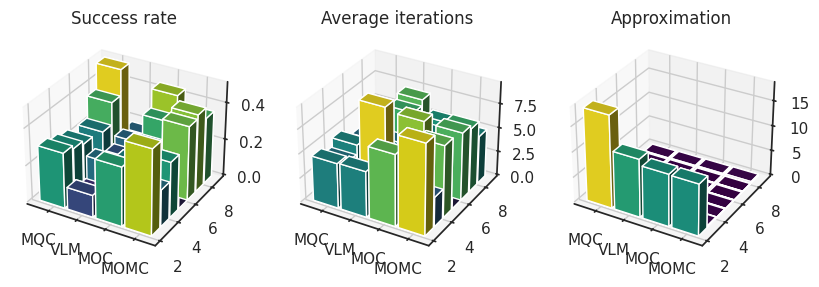

In [135]:
fig = plt.figure(figsize=(10, 7))

sns.set_style('white')


suc_ax = fig.add_subplot(131, projection='3d')
iter_ax = fig.add_subplot(132, projection='3d')
approx_ax = fig.add_subplot(133, projection='3d')

# success_trains = trainset[np.sum(np.where(trainset['Train_state (vec)'] > 0, 1, 0)) == trainset['Budget (int)']]
# penalties = success_trains['Penalty (str)'].astype(str)
# budgets = success_trains['Budget (flt)'].astype(float)



xpos, ypos = np.meshgrid(np.array([0,1,2,3]) - 0.5, Config['budgets'], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
print (f'xpos : {xpos}')
print (f'ypos : {ypos}')

# xpos = range(len(Config['penalty_list']))
# ypos = Config['budgets']
zpos = 0
dx = dy = 0.9

dz = success_rates.ravel()
colors = plt.cm.viridis(dz / dz.max())
suc_ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color = colors, zsort='average')
suc_ax.set_xticks([0,1,2,3])
suc_ax.set_xticklabels(Config['penalty_list'])
suc_ax.set_title('Success rate')
print(dz)

dz = average_iterations.ravel()
colors = plt.cm.viridis(dz / dz.max())
iter_ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color = colors, zsort='average')
iter_ax.set_xticks([0,1,2,3])
iter_ax.set_xticklabels(Config['penalty_list'])
iter_ax.set_title('Average iterations')

dz = approximations.ravel()
colors = plt.cm.viridis(dz / dz.max())
approx_ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color = colors, zsort = 'average')
approx_ax.set_xticks([0,1,2,3])
approx_ax.set_xticklabels(Config['penalty_list'])
approx_ax.set_title('Approximation')

plt.show()

# The same, but with hearmaps

<Figure size 640x480 with 0 Axes>

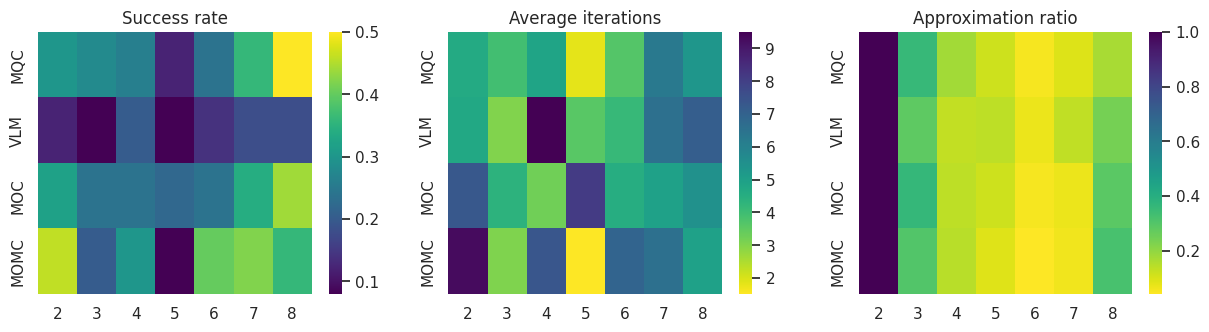

In [136]:

plt.clf()
fig = plt.figure(figsize=(15, 3.4))
suc_ax = fig.add_subplot(131)
iter_ax = fig.add_subplot(132)
approx_ax = fig.add_subplot(133)


data = pd.DataFrame(data = success_rates, index = Config['penalty_list'], columns = Config['budgets'])
sns.heatmap(data, cmap = 'viridis', ax = suc_ax)
suc_ax.set_title('Success rate')

data = pd.DataFrame(data = average_iterations, index = Config['penalty_list'], columns = Config['budgets'])
sns.heatmap(data, cmap = 'viridis_r', ax = iter_ax)
iter_ax.set_title('Average iterations')

data = pd.DataFrame(data = approximations, index = Config['penalty_list'], columns = Config['budgets'])
sns.heatmap(data, cmap = 'viridis_r', ax = approx_ax, vmax = 1)
approx_ax.set_title('Approximation ratio')



plt.show()

In [ ]:
ampl_data = [] 

In [130]:
from matplotlib import pyplot as plt 
import seaborn as sns 
from preparator import Preparator 

sns.set_style('white')

template = pd.read_csv('data/template_penalty.csv')
size = Config['size']
ansatz = Config['ansatz']
stepsize = Config['stepsize']
shots = Config['shots']

source = 'data/penalty/Penalty_size_{size}_penalty_{penalty}_ansatz_{ansatz}_stepsize_{stepsize}_shots_{shots}.csv'


ids = range(1,351) 

data = {}

for penalty in Config['penalty_list']: 
    data[penalty] = []
    
prep = Preparator()
     

for penalty in Config['penalty_list']:

    log = Logger(template, log_path = source.format(size = Config['size'], penalty = penalty, ansatz = Config['ansatz'], stepsize = Config['stepsize'], shots = Config['shots']))

    #print(penalty)
    for id in ids: 
        line = log.read(id)
        matrix = line['Matrix (mat)']
        #print(matrix)
        budget = line['Budget (flt)']
        penalty = line['Penalty (str)']
        print(f'{budget} | {id}')
        data[penalty].append(penalty_weight(matrix, budget, type = penalty))

plt.show()



2.0 | 1
3.0 | 2
4.0 | 3
5.0 | 4
6.0 | 5
7.0 | 6
8.0 | 7
2.0 | 8
3.0 | 9
4.0 | 10
5.0 | 11
6.0 | 12
7.0 | 13
8.0 | 14
2.0 | 15
3.0 | 16
4.0 | 17
5.0 | 18
6.0 | 19
7.0 | 20
8.0 | 21
2.0 | 22
3.0 | 23
4.0 | 24
5.0 | 25
6.0 | 26
7.0 | 27
8.0 | 28
2.0 | 29
3.0 | 30
4.0 | 31
5.0 | 32
6.0 | 33
7.0 | 34
8.0 | 35
2.0 | 36
3.0 | 37
4.0 | 38
5.0 | 39
6.0 | 40
7.0 | 41
8.0 | 42
2.0 | 43
3.0 | 44
4.0 | 45
5.0 | 46
6.0 | 47
7.0 | 48
8.0 | 49
2.0 | 50
3.0 | 51
4.0 | 52
5.0 | 53
6.0 | 54
7.0 | 55
8.0 | 56
2.0 | 57
3.0 | 58
4.0 | 59
5.0 | 60
6.0 | 61
7.0 | 62
8.0 | 63
2.0 | 64
3.0 | 65
4.0 | 66
5.0 | 67
6.0 | 68
7.0 | 69
8.0 | 70
2.0 | 71
3.0 | 72
4.0 | 73
5.0 | 74
6.0 | 75
7.0 | 76
8.0 | 77
2.0 | 78
3.0 | 79
4.0 | 80
5.0 | 81
6.0 | 82
7.0 | 83
8.0 | 84
2.0 | 85
3.0 | 86
4.0 | 87
5.0 | 88
6.0 | 89
7.0 | 90
8.0 | 91
2.0 | 92
3.0 | 93
4.0 | 94
5.0 | 95
6.0 | 96
7.0 | 97
8.0 | 98
2.0 | 99
3.0 | 100
4.0 | 101
5.0 | 102
6.0 | 103
7.0 | 104
8.0 | 105
2.0 | 106
3.0 | 107
4.0 | 108
5.0 | 109
6.0 | 110
7.0 | 11

In [118]:
pd.DataFrame(data)

,MQC,VLM,MOC,MOMC
0,0.773082,3.214739,1.071580,1.071580
1,0.773082,3.214739,0.315939,0.321474
2,0.773082,3.214739,0.225671,0.229624
3,0.773082,3.214739,0.175522,0.178597
4,0.773082,3.214739,0.143609,0.146125
...,...,...,...,...
345,0.953646,3.471527,0.192688,0.247966
346,0.953646,3.471527,0.149868,0.192863
347,0.953646,3.471527,0.122620,0.157797
348,0.953646,3.471527,0.103755,0.133520


<BarContainer object of 4 artists>

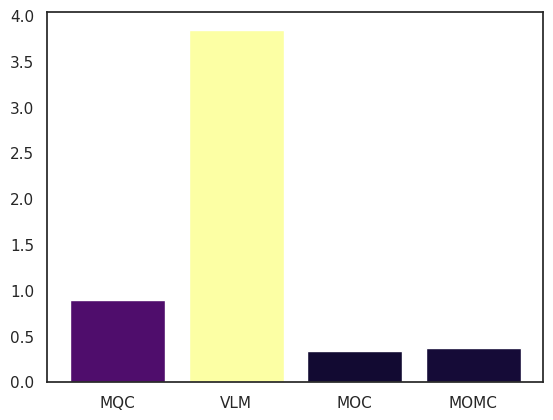

In [131]:


# for penalty in Config['penalty_list']:


height = np.array([np.mean(data[penalty]) for penalty in Config['penalty_list']])

plt.bar(x = Config['penalty_list'], height = height, color = plt.cm.inferno(height/ height.max()))

In [69]:
prep.penalty_weight(np.array([[1,1], [0,1]]), 6, 'VLM')

tensor(3, requires_grad=True)